**Сразу извиняюсь за кривое написание)**

# Context

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_eda = pd.read_csv('C:\\train.csv')
sns.set(context = 'notebook')

# Data quality assessment

In [3]:
data_eda.corr().unstack().abs().sort_values(ascending = False)[7:].drop_duplicates()

Fare         Pclass         0.417354
Survived     Pclass         0.289723
Age          Pclass         0.259109
Parch        SibSp          0.213126
Fare         Survived       0.187534
Parch        Age            0.125535
SibSp        Age            0.112459
Fare         Age            0.109164
Age          Survived       0.103895
Fare         Parch          0.061443
SibSp        Fare           0.059358
             Pclass         0.051436
Pclass       Parch          0.041848
Survived     Parch          0.023352
SibSp        Survived       0.007587
PassengerId  Age            0.002654
             Survived       0.001956
Fare         PassengerId    0.001036
PassengerId  SibSp          0.001000
Pclass       PassengerId    0.000893
Parch        PassengerId    0.000411
dtype: float64

In [4]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
data_eda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


# Data exploration

<AxesSubplot:>

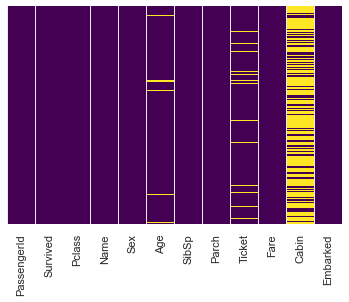

In [6]:
sns.heatmap(data_eda.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [7]:
def d(x):
    if x != 0:
        return str(x)[0]
    else:
        return np.nan
data_eda['first_l_cabin'] = data_eda['Cabin'].fillna(0).apply(d)
def d(x):
    if not str(x).split()[0].isdigit():
            if len(str(x).split('. ')) == 2 and len(str(x).split('.')) == 2 and len(str(x).split(' ')) == 2 and len(str(x).split('/')) == 1:
                return str(x).split('. ')[0]
            elif len(str(x).split('.')) == 2 and len(str(x).split('. ')) == 1 and len(str(x).split(' ')) == 1 and len(str(x).split('/')) == 1:
                return str(x).split('.')[0]
            elif len(str(x).split(' ')) == 2 and len(str(x).split('. ')) == 1 and len(str(x).split('.')) == 1 and len(str(x).split('/')) == 1:
                return str(x).split(' ')[0]
            elif len(str(x).split('/')) >= 2 and len(str(x).split('. ')) == 1 and len(str(x).split('.')) == 1:
                return str(x).split('/')[0]
    else:
        return np.nan
data_eda['first_l_ticket'] = data_eda['Ticket'].fillna(0).apply(d)
def d(x):
    if x != 0:
        return str(x)[1:]
    else:
        return np.nan
data_eda['num_of_cabin'] = data_eda['Cabin'].fillna(0).apply(d)
def d(x):
    if x != 0:
        return str(x).split(', ')[0]
    else:
        return np.nan
data_eda['first_name'] = data_eda['Name'].fillna(0).apply(d)
def d(x):
    if x != 0:
        return str(x).split(', ')[1]
    else:
        return np.nan
data_eda['last_name'] = data_eda['Name'].fillna(0).apply(d)
data_eda['family_size'] = data_eda['SibSp'] + data_eda['Parch']

In [8]:
data_eda['first_l_ticket'].value_counts()

PC       6375
A        5147
SC       2211
STON     1512
CA        772
PP        622
SOTON     547
C         220
WE        175
P         149
SCO       101
AQ         73
LP         56
Fa         54
SW         38
SO         34
W          28
A4         19
Name: first_l_ticket, dtype: int64

In [9]:
data_eda['first_l_ticket'].drop_duplicates()

0         NaN
2          CA
3           A
19         PC
22       None
45         SC
197      STON
236         C
276        AQ
301        WE
343        PP
438        Fa
586         P
907     SOTON
1050       SW
1299        W
1920       SO
1927      SCO
2975       LP
5560       A4
Name: first_l_ticket, dtype: object

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'возраст'}, xlabel='Age', ylabel='Density'>

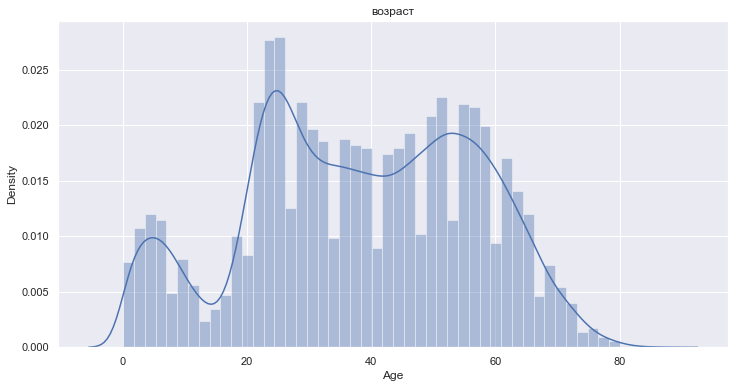

In [10]:
plt.figure(figsize=(12,6))
plt.title('возраст')
sns.distplot(a=data_eda['Age'], kde=True)

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Выживание (кол-во)'}, xlabel='Survived'>

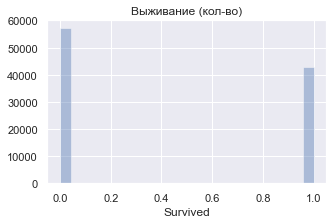

In [11]:
plt.figure(figsize=(5,3))
plt.title('Выживание (кол-во)')
sns.distplot(a=data_eda['Survived'], kde=False)

Text(0.5, 1.0, 'Цена билета')

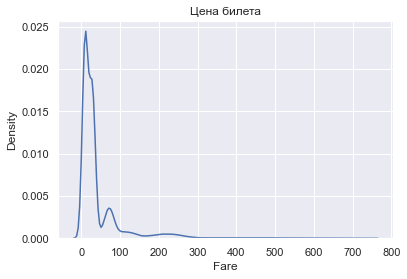

In [12]:
sns.kdeplot(data_eda['Fare'])
plt.title('Цена билета')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Класс')

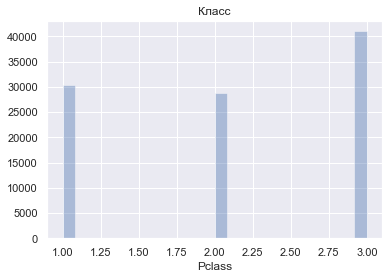

In [13]:
sns.distplot(a=data_eda['Pclass'], kde=False)
plt.title('Класс')

Text(0.5, 1.0, 'кол-во братьев и сестёр')

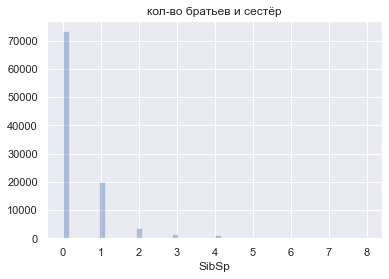

In [14]:
sns.distplot(a=data_eda['SibSp'], kde=False)
plt.title('кол-во братьев и сестёр')

<AxesSubplot:title={'center':'кол-во родителей и детей'}, xlabel='Parch', ylabel='Density'>

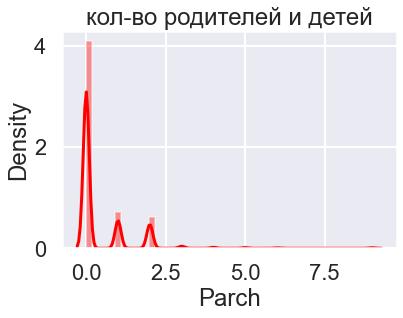

In [15]:
sns.set(context = 'poster')
plt.title('кол-во родителей и детей')
sns.distplot(a=data_eda['Parch'], kde=True, color = 'red')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'возраст выживших и умерших')

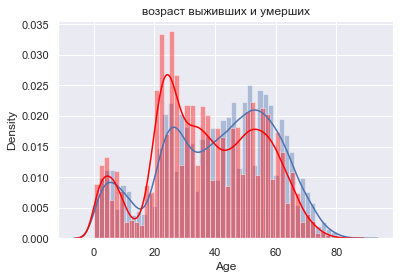

In [16]:
sns.set(context = 'notebook')
sns.distplot(a=data_eda.loc[data_eda['Survived'] == 1, 'Age'], label = 'Surv.')
sns.distplot(a=data_eda.loc[data_eda['Survived'] == 0, 'Age'], label = 'Not Surv.', color = 'red')
plt.title('возраст выживших и умерших')

In [17]:
pd.crosstab([data_eda.Sex,data_eda.Survived],data_eda.Pclass,margins=True).style.background_gradient(cmap='summer_r')

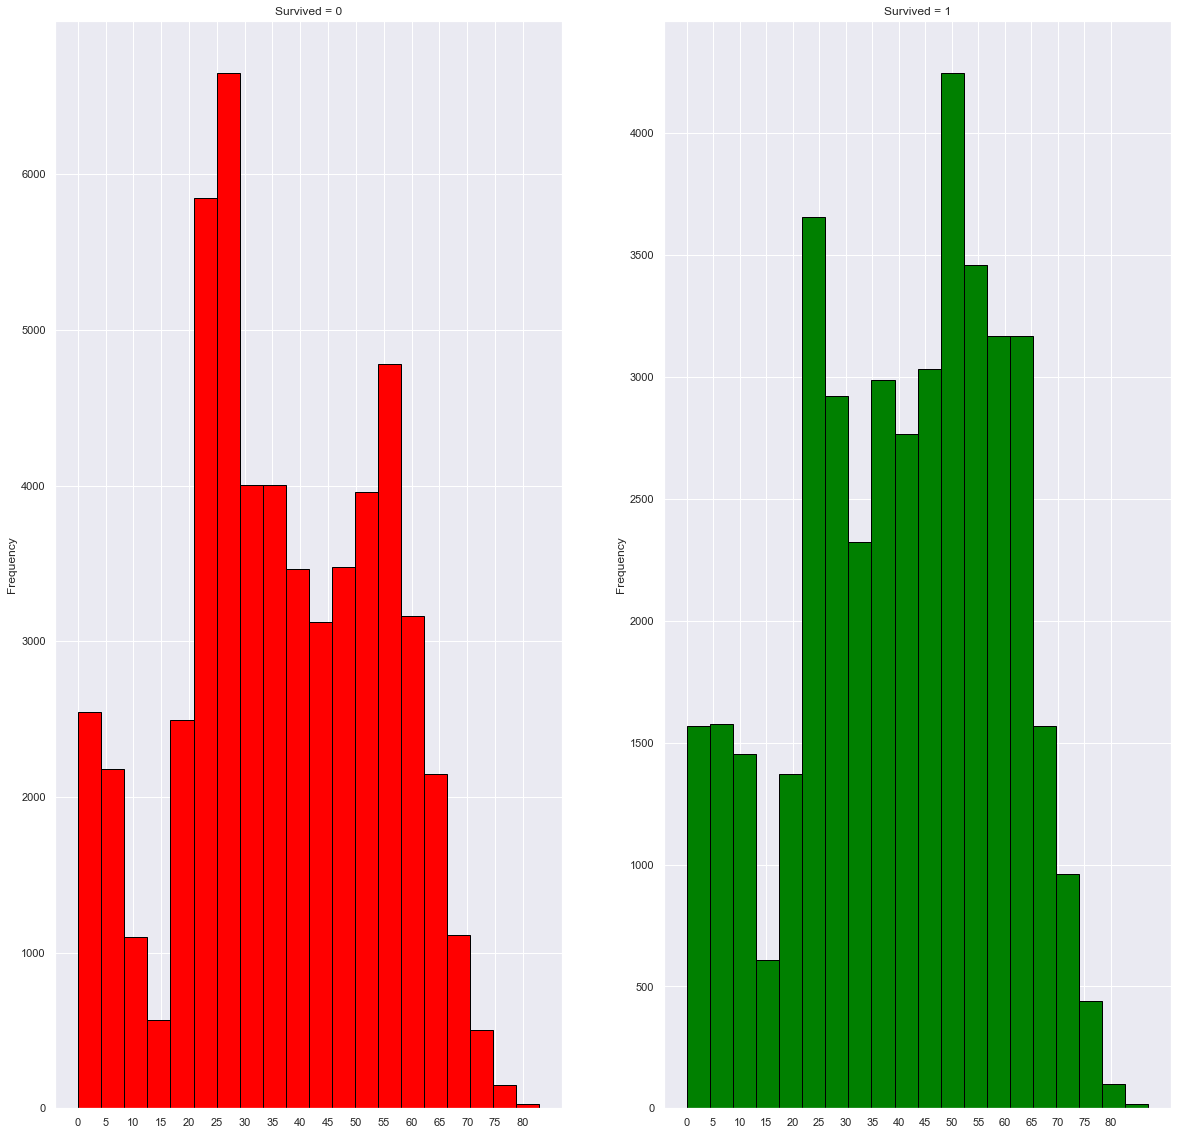

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,20))
data_eda[data_eda['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data_eda[data_eda['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

<AxesSubplot:>

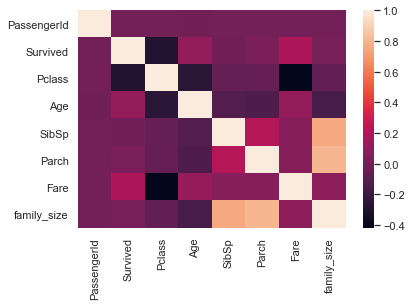

In [22]:
sns.heatmap(data_eda.corr())

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


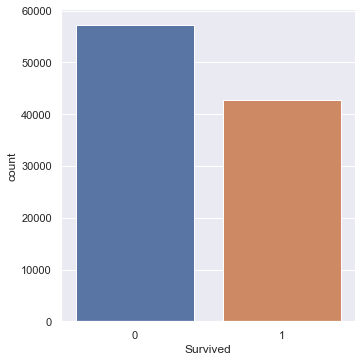

In [20]:
sns.catplot('Survived', data=data_eda, kind = 'count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'выживание по полам')

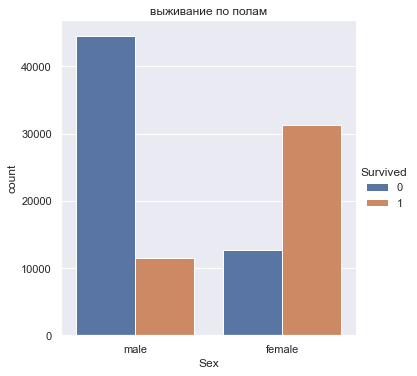

In [21]:
#выживание по полам
sns.catplot('Sex', data=data_eda, hue="Survived", kind = 'count')
plt.title('выживание по полам')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


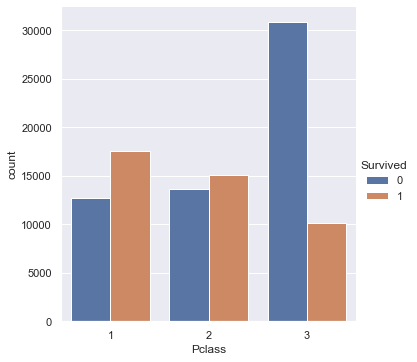

In [22]:
sns.catplot('Pclass', data=data_eda, hue="Survived", kind = 'count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


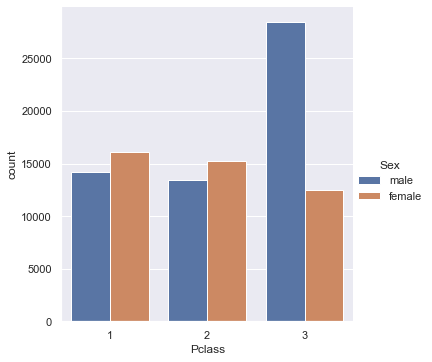

In [23]:
sns.catplot('Pclass', data=data_eda, hue='Sex', kind = 'count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


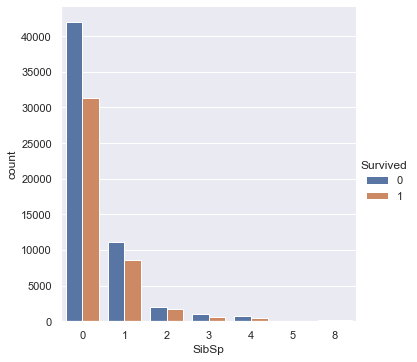

In [24]:
sns.catplot('SibSp', data=data_eda, hue='Survived', kind='count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


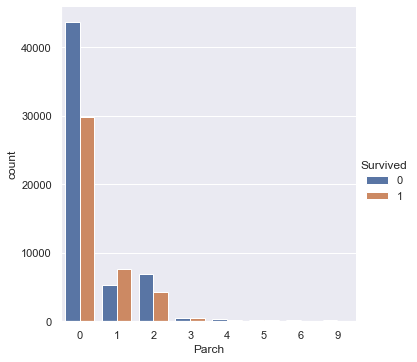

In [25]:
sns.catplot('Parch', data=data_eda, hue='Survived', kind='count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


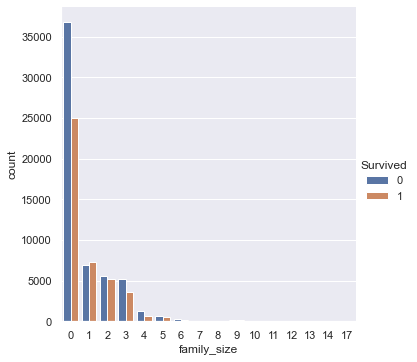

In [26]:
sns.catplot('family_size', data=data_eda, hue='Survived', kind='count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 144000x144000 with 0 Axes>

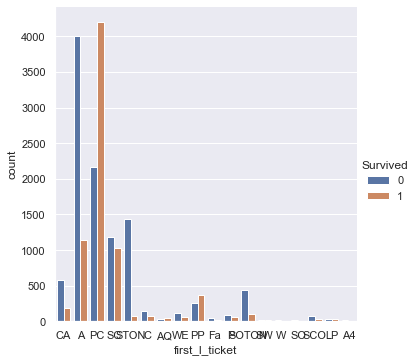

<Figure size 144000x144000 with 0 Axes>

In [27]:
sns.catplot('first_l_ticket', data=data_eda, hue='Survived', kind='count')
plt.figure(figsize=(2000, 2000))

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


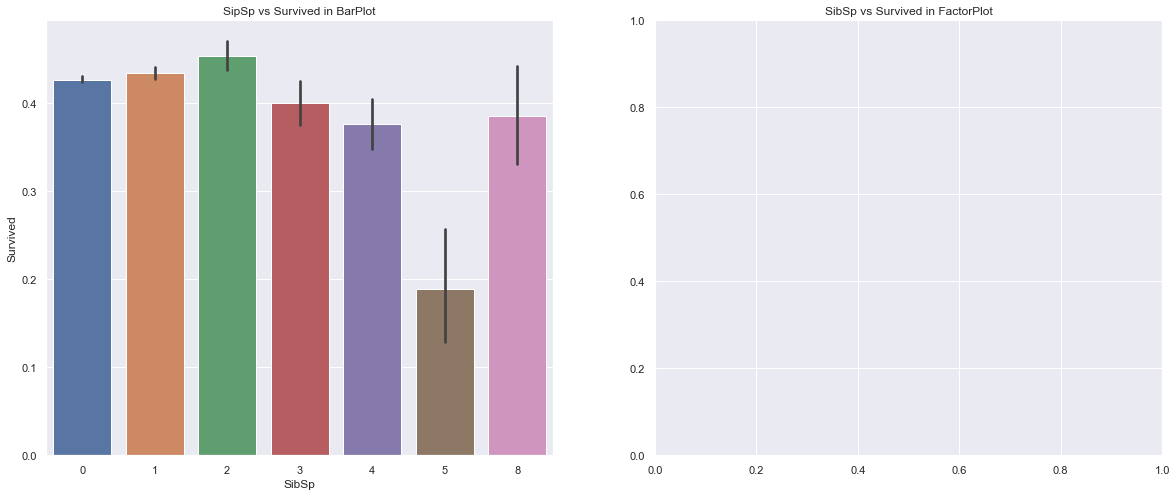

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived', data=data_eda,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('SibSp','Survived', data=data_eda,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


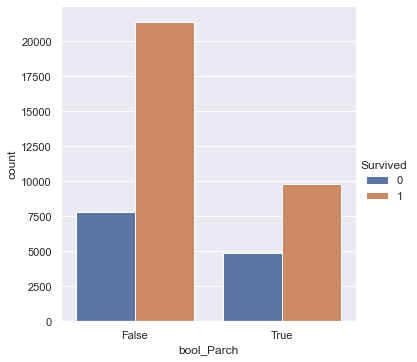

In [30]:
data_eda['bool_Parch'] = data_eda['Parch'] > 0
sns.catplot('bool_Parch', data=data_eda.loc[data_eda['Sex'] == 'female'], hue = 'Survived', kind='count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


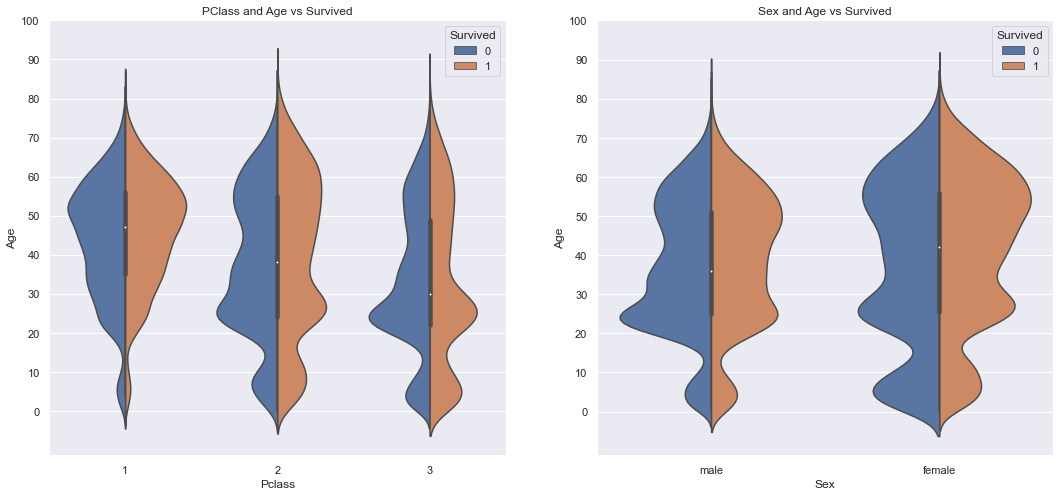

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data_eda,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data_eda,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [32]:
pd.crosstab(data_eda.SibSp,data_eda.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,19483,22125,31700
1,8714,4283,6761
2,1368,1329,1006
3,525,293,817
4,154,483,531
5,24,40,68
8,47,126,123


In [33]:
pd.crosstab(data_eda.Parch,data_eda.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
Parch,,,
0,21888,20166,31486
1,3001,5965,4030
2,4537,2042,4657
3,519,177,287
4,154,68,224
5,109,117,105
6,26,54,124
9,81,90,93


In [34]:
data_eda['first_l_cabin'].value_counts()

C    11825
B     7439
A     6307
D     3637
E     1749
F      663
G      482
T       32
Name: first_l_cabin, dtype: int64

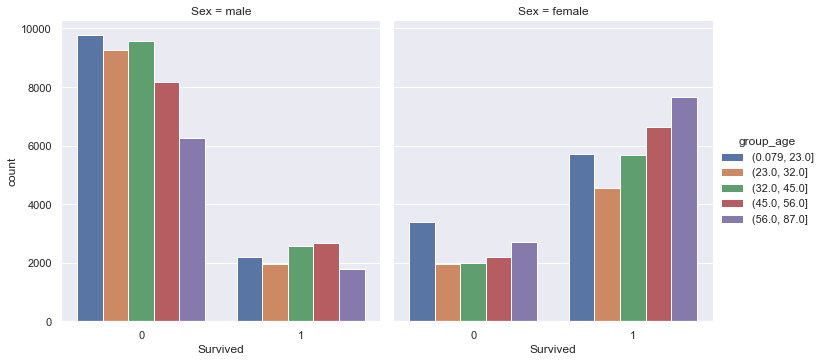

In [35]:
data_eda['group_age'] = pd.qcut(data_eda['Age'], 5)
sns.catplot(col = 'Sex', x='Survived', data=data_eda, hue='group_age', kind='count')

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


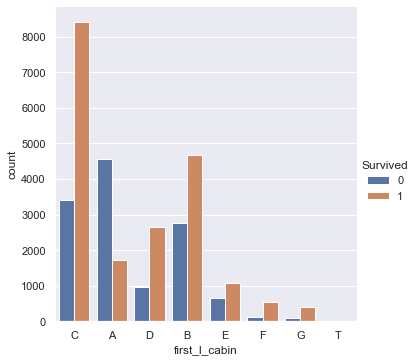

In [36]:
sns.catplot('first_l_cabin', data=data_eda, hue = 'Survived', kind='count')

In [37]:
data_eda['first_l_cabin'].value_counts()

C    11825
B     7439
A     6307
D     3637
E     1749
F      663
G      482
T       32
Name: first_l_cabin, dtype: int64

In [38]:
data_eda['Embarked'].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

<AxesSubplot:title={'center':'распределение по портам'}, xlabel='Survived', ylabel='Density'>

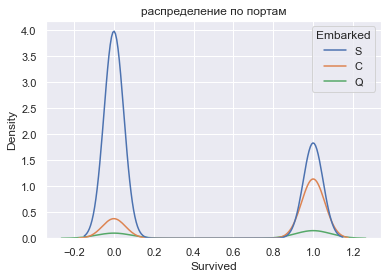

In [39]:
plt.title('распределение по портам')
sns.kdeplot(data_eda['Survived'], hue = data_eda['Embarked'])

<AxesSubplot:title={'center':'распределение по типам билета'}, xlabel='Survived', ylabel='Density'>

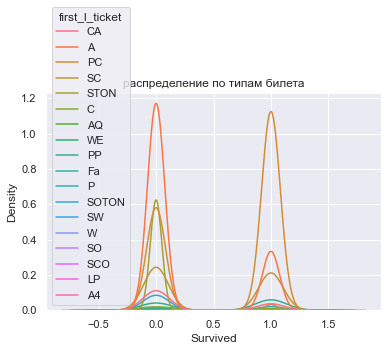

In [40]:
plt.title('распределение по типам билета')
sns.kdeplot(data_eda['Survived'], hue = data_eda['first_l_ticket'])

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'распределение с детьми и без'}, xlabel='Survived'>

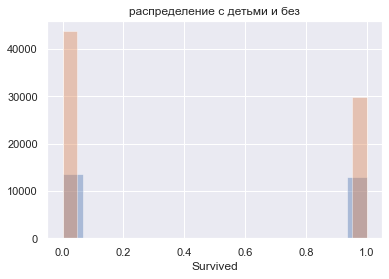

In [41]:
plt.title('распределение с детьми и без')
sns.distplot(data_eda.loc[data_eda['Parch'] >= 1, 'Survived'], kde = False)
sns.distplot(data_eda.loc[data_eda['Parch'] == 0, 'Survived'], kde = False)

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='group_age', ylabel='Fare'>

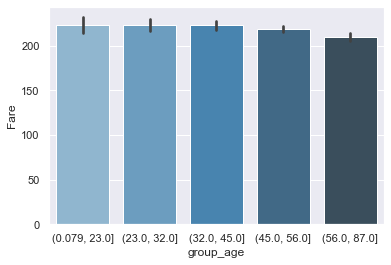

In [62]:
sns.barplot('group_age','Fare', data=data_eda[data_eda['Fare']>100], palette="Blues_d")

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='group_age', ylabel='Fare'>

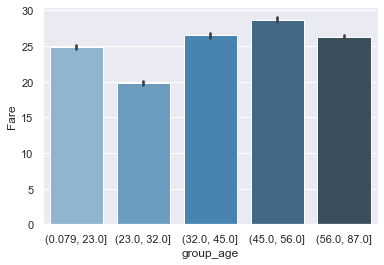

In [63]:
sns.barplot('group_age','Fare', data=data_eda[data_eda['Fare']<=100], palette="Blues_d")

<AxesSubplot:title={'center':'Какие билеты покупали люди с семьёй и без'}, xlabel='Fare', ylabel='Density'>

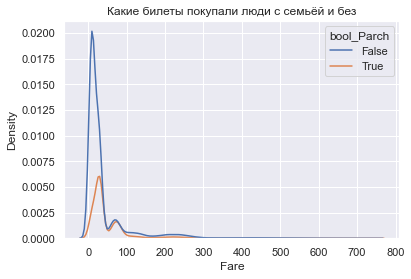

In [65]:
plt.title('Какие билеты покупали люди с семьёй и без')
sns.kdeplot(data_eda['Fare'], hue = data_eda['bool_Parch'])

In [66]:
surv_name = pd.DataFrame(data_eda[data_eda['Survived'] == 1]['first_name'].value_counts())
surv_name['name'] = surv_name.index
surv_name = surv_name.rename(columns = {'first_name':'survived'})
not_surv_name = pd.DataFrame(data_eda[data_eda['Survived'] == 0]['first_name'].value_counts())
not_surv_name['name'] = not_surv_name.index
name_l = not_surv_name.rename(columns={'first_name':'not_survived'}).merge(surv_name, how = 'outer')
name_l = name_l.fillna(0)
name_l['coef'] = name_l['survived'] / (name_l['survived'] + name_l['not_survived'])
name_l['quantity'] = name_l['survived'] + name_l['not_survived']

In [67]:
name_l.sort_values(by='coef', ascending = False).iloc[1085]

not_survived     0.0
name            Haga
survived         1.0
coef             1.0
quantity         1.0
Name: 18945, dtype: object

In [68]:
name_l.sort_values(by='quantity', ascending = False)

,not_survived,name,survived,coef,quantity
0,656.0,Smith,506.0,0.435456,1162.0
1,547.0,Johnson,403.0,0.424211,950.0
2,432.0,Williams,301.0,0.410641,733.0
3,382.0,Jones,299.0,0.439060,681.0
4,377.0,Brown,288.0,0.433083,665.0
...,...,...,...,...,...
13620,1.0,Schmiedeskamp,0.0,0.000000,1.0
13621,1.0,Jorstad,0.0,0.000000,1.0
13625,1.0,Orio,0.0,0.000000,1.0
13626,1.0,Belgarde,0.0,0.000000,1.0


In [69]:
surv_name = pd.DataFrame(data_eda[data_eda['Survived'] == 1]['last_name'].value_counts())
surv_name['name'] = surv_name.index
surv_name = surv_name.rename(columns = {'last_name':'survived'})
not_surv_name = pd.DataFrame(data_eda[data_eda['Survived'] == 0]['last_name'].value_counts())
not_surv_name['name'] = not_surv_name.index
name_l = not_surv_name.rename(columns={'last_name':'not_survived'}).merge(surv_name, how = 'outer')
name_l = name_l.fillna(0)
name_l['coef'] = name_l['survived'] / (name_l['survived'] + name_l['not_survived'])
name_l['quantity'] = name_l['survived'] + name_l['not_survived']

In [70]:
name_l.sort_values(by='coef', ascending = False).iloc[1085]

not_survived         0.0
name            Georgina
survived             2.0
coef                 1.0
quantity             2.0
Name: 3199, dtype: object

In [71]:
name_l.sort_values(by='quantity', ascending = False)

,not_survived,name,survived,coef,quantity
1,1661.0,James,451.0,0.213542,2112.0
0,1671.0,John,416.0,0.199329,2087.0
2,1555.0,Robert,396.0,0.202973,1951.0
3,1328.0,Michael,357.0,0.211869,1685.0
4,1219.0,William,306.0,0.200656,1525.0
...,...,...,...,...,...
3306,0.0,Assunta,1.0,1.000000,1.0
3307,0.0,Tuyet,1.0,1.000000,1.0
3308,0.0,Kimberli,1.0,1.000000,1.0
3309,0.0,Alisia,1.0,1.000000,1.0


<AxesSubplot:title={'center':'цены билетов в разных портах'}, xlabel='Fare', ylabel='Density'>

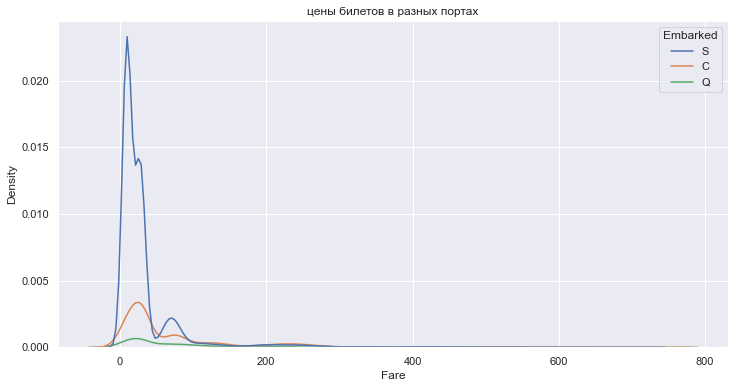

In [72]:
plt.figure(figsize=(12, 6))
plt.title('цены билетов в разных портах')
sns.kdeplot(data_eda['Fare'], hue = data_eda['Embarked'])

<AxesSubplot:title={'center':'цены билетов в разных портах'}, xlabel='Fare', ylabel='Density'>

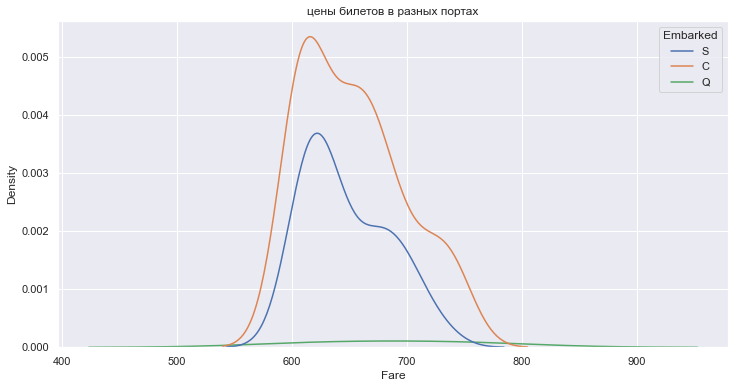

In [73]:
plt.figure(figsize=(12, 6))
plt.title('цены билетов в разных портах')
sns.kdeplot(data_eda.loc[data_eda['Fare'] > 600, 'Fare'], hue = data_eda.loc[data_eda['Fare'] > 600, 'Embarked'])

<AxesSubplot:title={'center':'количество купленных билетов разных цен в разных классах'}, xlabel='Fare', ylabel='Density'>

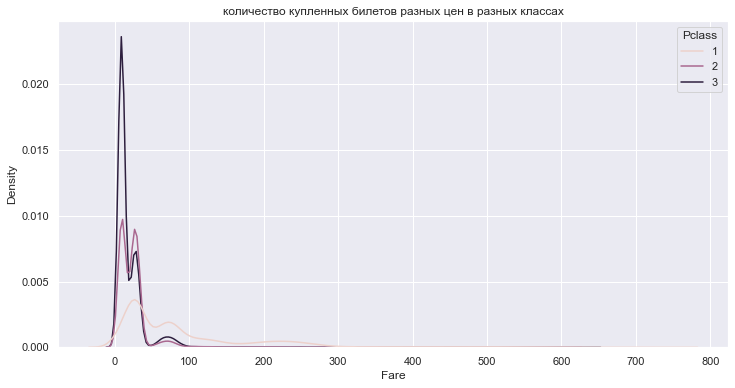

In [74]:
plt.figure(figsize=(12, 6))
plt.title('количество купленных билетов разных цен в разных классах')
sns.kdeplot(data_eda['Fare'], hue = data_eda['Pclass'])

<AxesSubplot:title={'center':'количество купленных билетов разных цен больше 600 в разных классах'}, xlabel='Fare', ylabel='Density'>

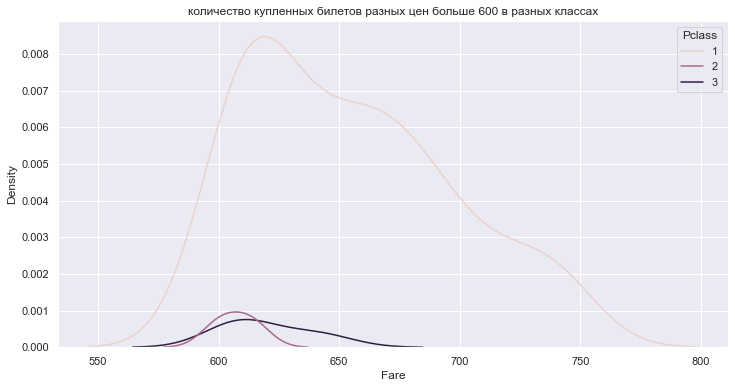

In [75]:
plt.figure(figsize=(12, 6))
plt.title('количество купленных билетов разных цен больше 600 в разных классах')
sns.kdeplot(data_eda.loc[data_eda['Fare'] > 600, 'Fare'], hue = data_eda.loc[data_eda['Fare'] > 600, 'Pclass'])

In [76]:
print('средняя цена билкта в порту S', data_eda.loc[data_eda['Embarked'] == 'S', 'Fare'].mean())

средняя цена билкта в порту S 33.20000777270393


In [77]:
print('средняя цена билкта в порту С', data_eda.loc[data_eda['Embarked'] == 'C', 'Fare'].mean())

средняя цена билкта в порту С 71.54907285366082


In [78]:
print('средняя цена билкта в порту Q', data_eda.loc[data_eda['Embarked'] == 'Q', 'Fare'].mean())

средняя цена билкта в порту Q 73.38514771048735


C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'влияние номера кабины на смертность')

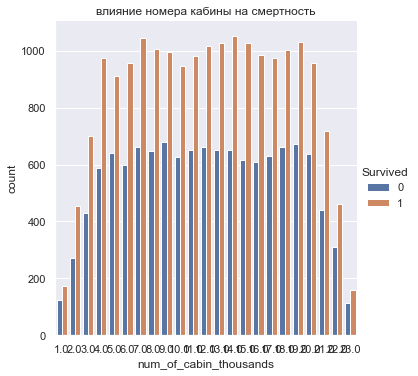

In [79]:
def z(x):
    return int(int(x) / 1000)
data_eda['num_of_cabin_thousands'] = data_eda['num_of_cabin'].dropna().apply(z)
sns.catplot('num_of_cabin_thousands', data = data_eda, hue = 'Survived', kind = 'count')
plt.title('влияние номера кабины на смертность')

<AxesSubplot:xlabel='Parch', ylabel='Density'>

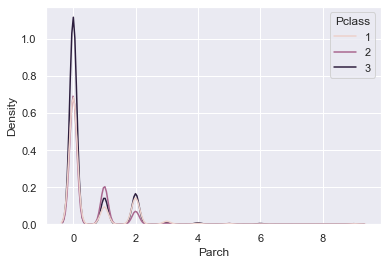

In [80]:
sns.kdeplot(data_eda['Parch'], hue = data_eda['Pclass'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

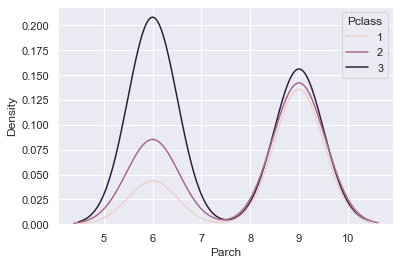

In [81]:
sns.kdeplot(data_eda.loc[data_eda['Parch'] > 5, 'Parch'], hue = data_eda.loc[data_eda['Parch'] > 5, 'Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

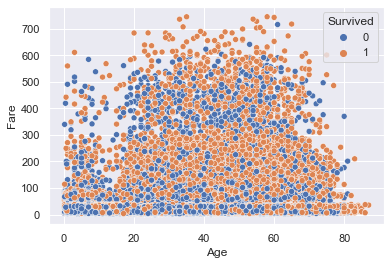

In [82]:
sns.scatterplot(x=data_eda['Age'], y=data_eda['Fare'], hue = data_eda['Survived'])

**посмотрим на эту таблицу через другой метод**

<AxesSubplot:title={'center':'Выживаемость в зависимости от цены билета'}, xlabel='Fare', ylabel='Density'>

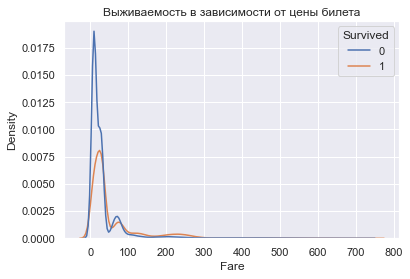

In [83]:
plt.title('Выживаемость в зависимости от цены билета')
sns.kdeplot(data_eda['Fare'], hue = data_eda['Survived'])

**можно выделить участок со 100 до 300, т.к. в нём очень много выживших**

<AxesSubplot:title={'center':'Выживаемость в зависимости от цены билета'}, xlabel='Fare', ylabel='Density'>

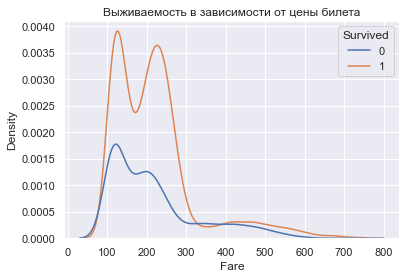

In [84]:
plt.title('Выживаемость в зависимости от цены билета')
sns.kdeplot(data_eda.loc[data_eda['Fare'] > 100, 'Fare'], \
            hue = data_eda.loc[data_eda['Fare'] > 100, 'Survived'])

<AxesSubplot:title={'center':'Выживаемость в зависимости от цены билета'}, xlabel='Fare', ylabel='Density'>

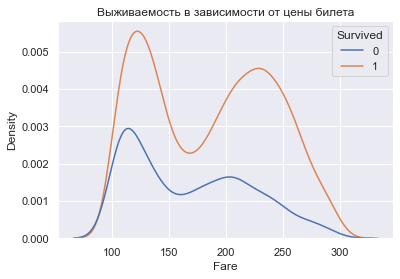

In [85]:
plt.title('Выживаемость в зависимости от цены билета')
sns.kdeplot(data_eda.loc[(data_eda['Fare'] > 100) & (data_eda['Fare'] < 300), 'Fare'], \
            hue = data_eda.loc[(data_eda['Fare'] > 100) & (data_eda['Fare'] < 300), 'Survived'])

**самая лучшая цена билета 250**

<AxesSubplot:xlabel='family_size', ylabel='Fare'>

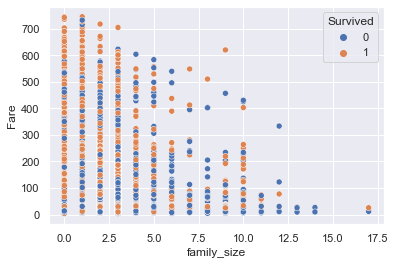

In [86]:
sns.scatterplot(y=data_eda['Fare'], x=data_eda['family_size'], hue=data_eda['Survived'])

<AxesSubplot:title={'center':'Выживание людей до 18 лет'}, xlabel='Age', ylabel='Density'>

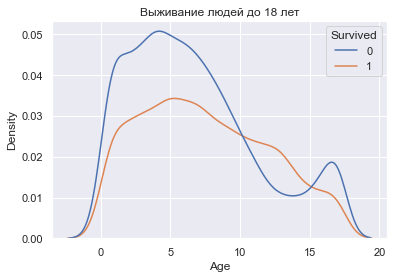

In [87]:
plt.title('Выживание людей до 18 лет')
sns.kdeplot(data_eda.loc[data_eda['Age'] < 18, 'Age'], hue = data_eda['Survived'])

<AxesSubplot:title={'center':'Выживание людей после 18 лет'}, xlabel='Age', ylabel='Density'>

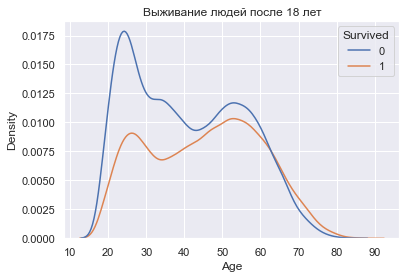

In [88]:
plt.title('Выживание людей после 18 лет')
sns.kdeplot(data_eda.loc[data_eda['Age'] >= 18, 'Age'], hue = data_eda['Survived'])

# Summary

**ЧТОБЫ ЛУЧШЕ ЧИТАЛОСЬ, СОВЕТУЮ НЕ ЗАПУСКАТЬ ПОСЛЕДУЮЩИЕ ПУНКТЫ**

Больше всего ехало людей без родных 
Лучший вораст для выживания 41-43 года
Большее кол-во людей не выжило
Больше выжило девушек, чем парней
Больше выжило людей из 1 класса
Больше девушек было в 1 и 2 классах, а в 3 было больше парней
Больше людей в соотношение выжило/не выжило выжило с 2 SibSp
Лучшее количество родствеников на борту - 1
Людей, чей билет с припиской PC, выжило больше в соотношении выжило/не выжило
Женщин без родствеников выжило больше чем с родствениками
Больше людей выживало в кабинах с буквами C и D
Больше людей выживало, ехавших с порта C
Чаще всего люди покупали дешёвые билеты
Люди с детьми покупали билеты в более меньшем диапазоне
1085 имён имеет выживаемость 100%
Самое популярное имя - Smith (1182 раза)
1085 фамилий имеет выживаемость 100%
Самая популярная фамилия - James (2112 раз)
Дешёвые билеты чаще покупали в порту S и 3 класс
Дорогие билеты чаще покупали в порту C и 1 класс
средняя цена билкта в порту S 33.18886150348626
средняя цена билкта в порту С 71.47903456979319
средняя цена билкта в порту Q 73.3129867256636
номер кабины не влияет на выживание
Самая лучшая цена билета 250
Чем больше людей в семье, тем меньше средняя цена билета
Дети 12-14 лет выживали чаще, чем не выживали
Люди 64-75 лет выживали чаще, чем не выживали
Самому старшему спасённому человеку +-85 лет

**Билет и человек с большими шансами на выживание**
лет: 42
пол: Женский
класс: 1
буква кабины: С
порт посадки: С
иметь имя и фамилию из этих таблиц:
цена билета = +-250
количество родствеников на борту: 0
количество SibSp на борту: 2
буквы в билете: PC

Контакт для связи в ds: BelyaevAlex